<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Unsupervised%20Learning/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

**K-Means Clustering** is an unsupervised machine learning algorithm that groups data points into "K" clusters based on their proximity to cluster centroids. K-means clustering is used in customer segmentation, document classification, recommendation systems, and much more.

# What Is a Centroid?

A centroid is the center point of a cluster, representing the mean position of all data points assigned to that cluster. In mathematical terms, the centroid of a cluster is calculated by averaging the feature values of all points in the cluster.

# Steps:
1. **Initialization**: Randomly initialize K centroids in the data space.
2. **Assignment**: Each data point is assigned to the nearest centroid based on the Euclidean distance.
3. **Centroid Update**: After assigning all points, recalculate the centroids by taking the mean of the points assigned to each cluster.
4. **Repeat Until Convergence**: Repeat 2 and 3 until the centroids stop moving or a maximum number of iterations is reached.

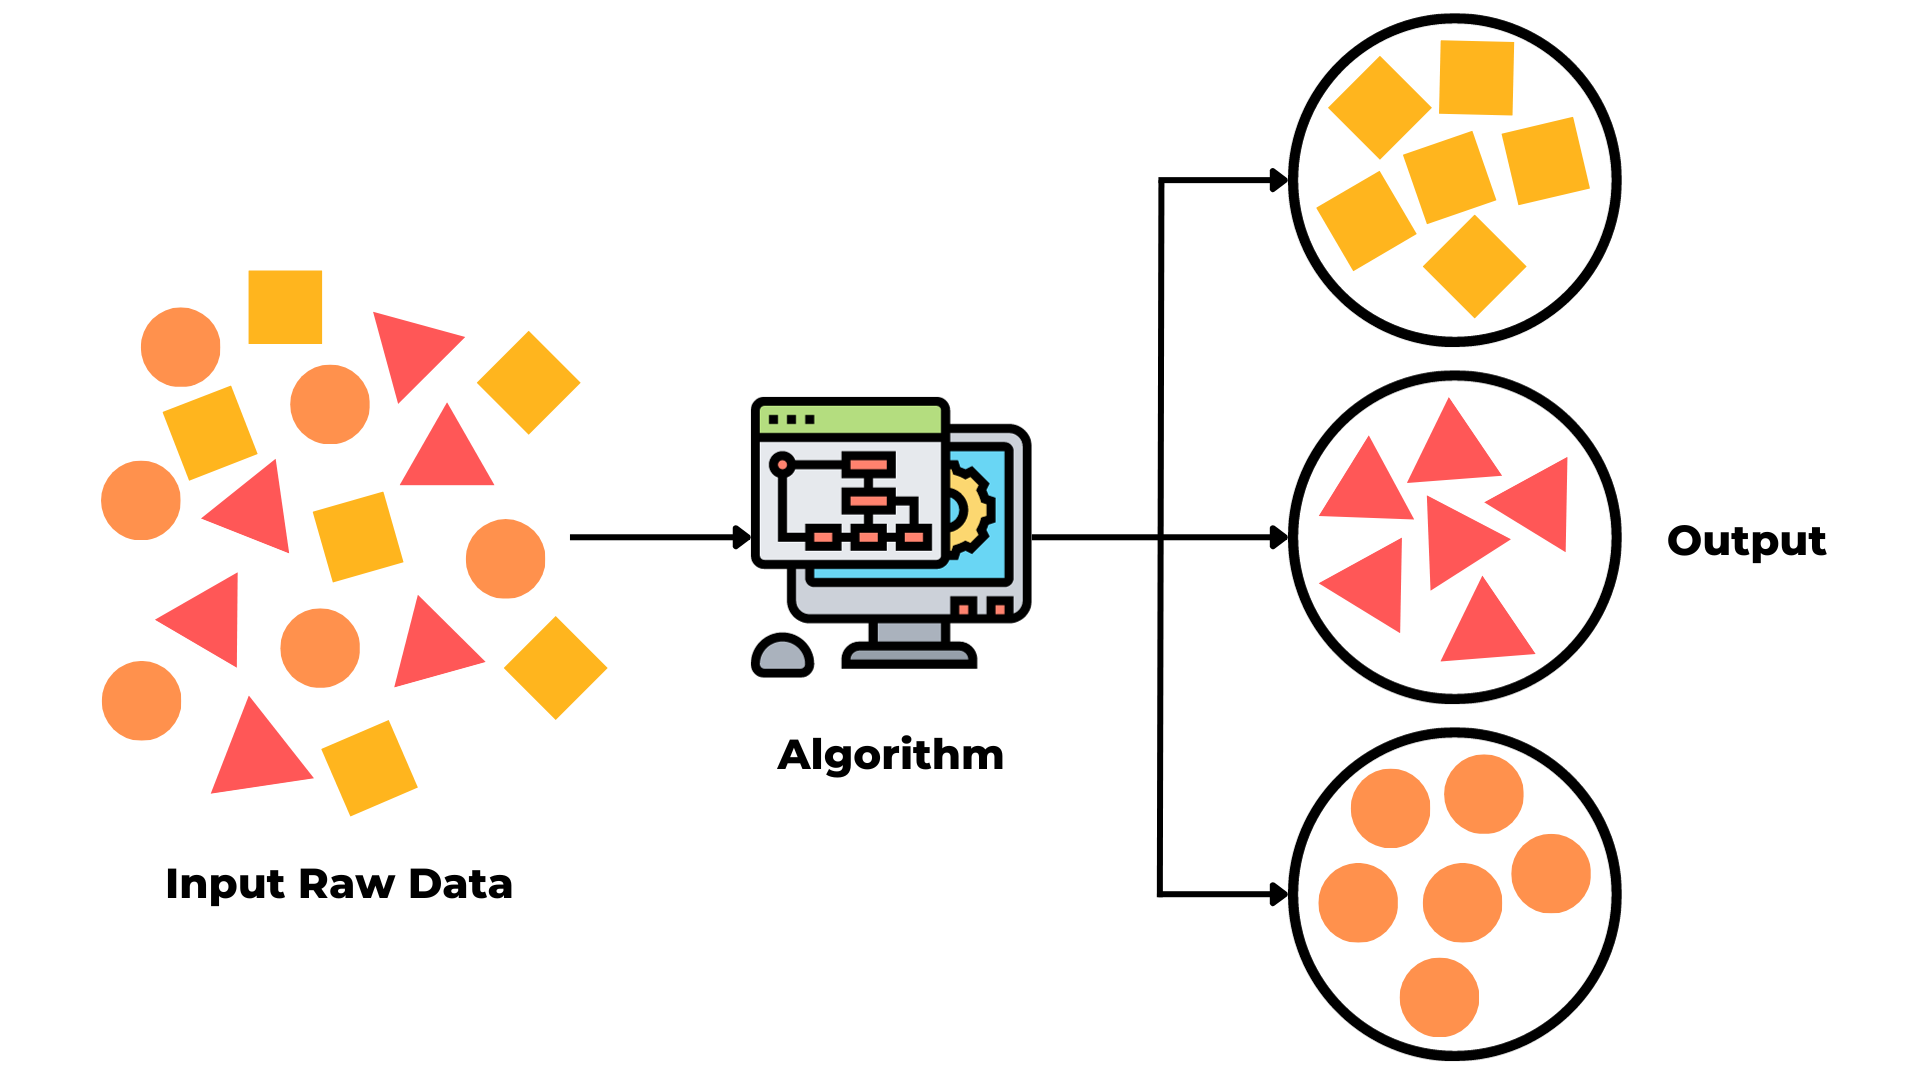

To show the steps of K-Means clustering we'll begin with how data points look when assigned to random clusters. We first simulate a random initial cluster labels for visualization.

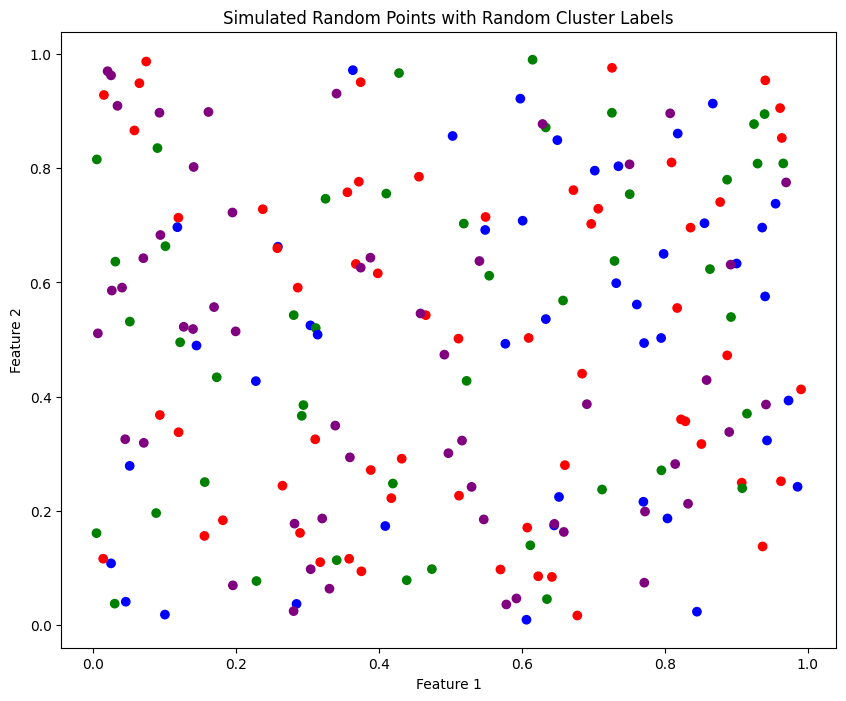

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random 2D points
np.random.seed(42)  # For reproducibility
X = np.random.rand(200, 2)  # 200 points in a 2D space, values between 0 and 1

# Simulate random cluster labels
y = np.random.randint(0, 4, size=X.shape[0])  # Randomly assign points to 4 clusters

# Define a function to map cluster labels to colors
def colors(label):
    color_map = ['red', 'blue', 'green', 'purple']
    return color_map[label]

# Assign colors based on labels
c = [colors(label) for label in y]

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Random Points with Random Cluster Labels')
plt.show()

Then initializing the cluster centers. In K-Means, initial cluster centers determine the starting point for the algorithm.

In [ ]:
# Randomly initialize cluster centers
centers = []
for k in range(3):  # Choose number of clusters
    i = np.random.randint(0, X.shape[0])
    point = (X[i, 0], X[i, 1])  # Only include coordinates
    centers.append(point)


Defining our funtions for distance calculation, label assignment, and cluster assignment:

In [ ]:
def distance(i, X, center):
    return np.sqrt(np.sum((X[i] - center) ** 2))

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])  # Distances to all centers
    label = np.argmin(distances)  # Index of the closest center
    return label

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

We assign clusters to data points based on initial random centers and visualize the results using scatter plots.

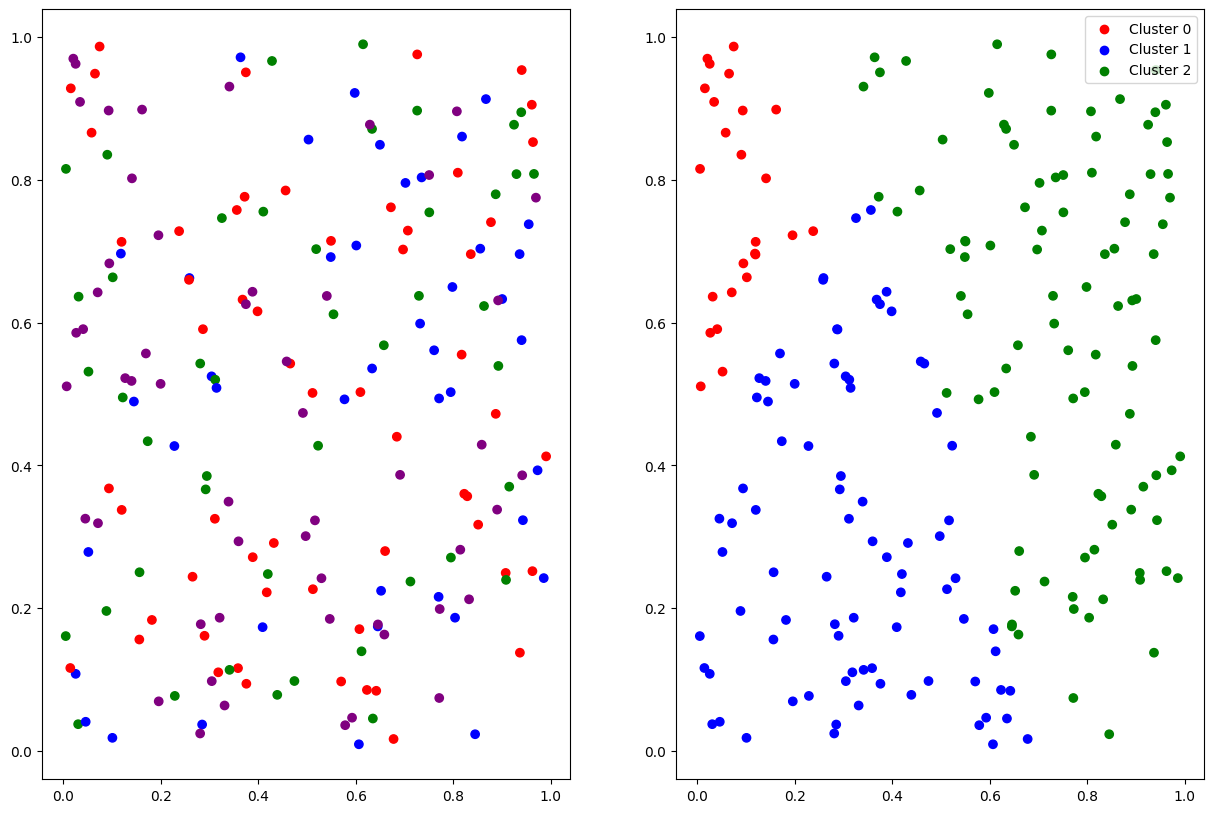

In [ ]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.scatter(X[:, 0], X[:, 1], c=c)

# Plot data with current colors
ax2.scatter(X[:, 0], X[:, 1], c=current_colors)
for i, center in enumerate(centers):
    ax2.scatter(center[0], center[1], color=colors(i), label=f'Cluster {i}')

ax2.legend()
plt.show()

The first plot shows randomly labeled data, simulating the starting point before clustering.

The second plot shows current clusters assigned by the algorithm, along with their centroids.

In K-Means Clustering, the centroids must be updated iteratively until they stop changing or the algorithm reaches a maximum number of iterations. The following code block defines our function to compute the mean coordinates of all points assigned to each cluster, resulting in new centroids.

In [ ]:
def update_centers(X, centers):
    """
    Update cluster centers based on the current cluster assignments.

    Parameters:
    - X: numpy array of shape (n_samples, n_features), dataset.
    - centers: list of tuples, current cluster centers.

    Returns:
    - new_centers: list of tuples, updated cluster centers.
    """
    # Assign current labels
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    n_features = X.shape[1]

    # Initialize center means as a dictionary
    center_means = {i: [0] * n_features for i in range(k)}
    counts = {i: 0 for i in range(k)}

    # Sum coordinates for points in each cluster
    for i in range(len(X)):
        label = current_labels[i]
        counts[label] += 1
        for j in range(n_features):
            center_means[label][j] += X[i, j]

    # Compute the new centers by dividing sums by counts
    new_centers = []
    for i in range(k):
        if counts[i] > 0:  # Avoid division by zero
            new_center = tuple(center_means[i][j] / counts[i] for j in range(n_features))
        else:  # If no points are assigned, retain the previous center
            new_center = centers[i]
        new_centers.append(new_center)

    return new_centers


Now we update cluster centers, assign clusters, and visualize the results of a K-Means-like clustering process.

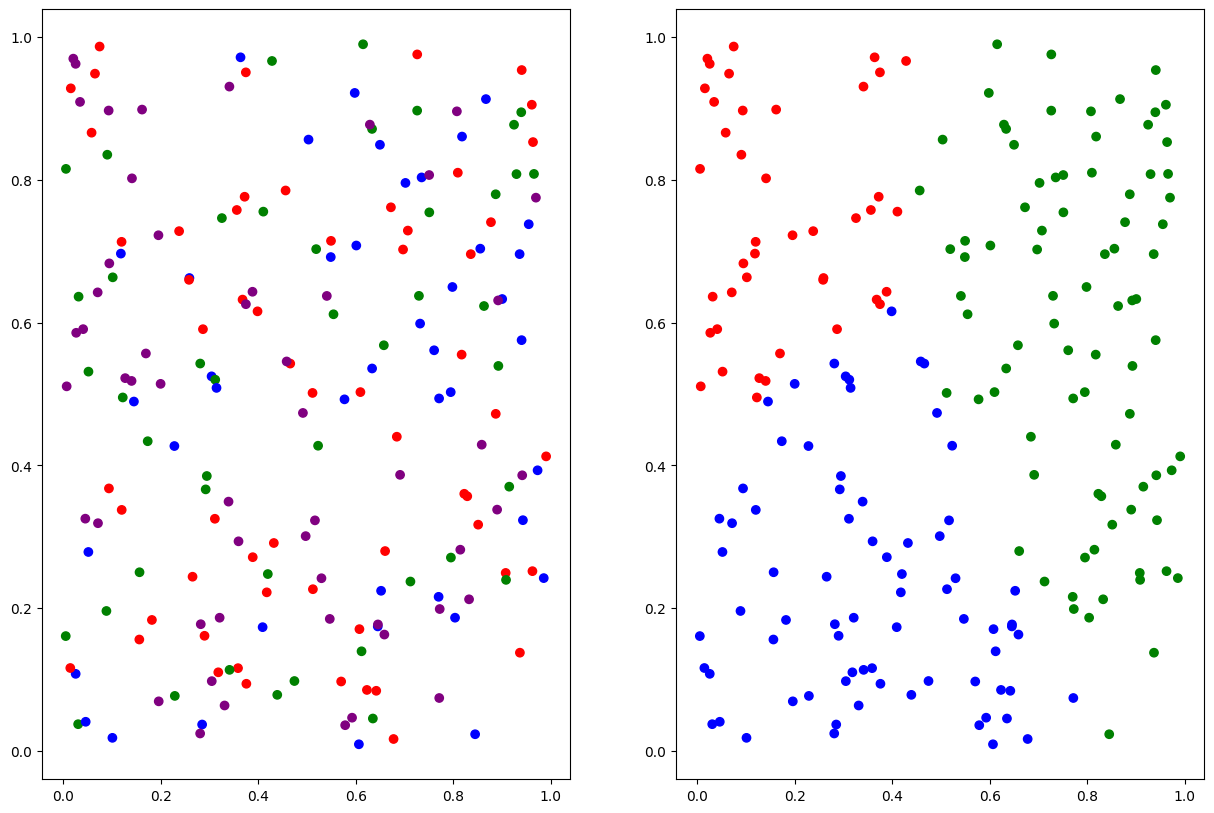

In [ ]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

The first plot shows the initial state with random labels.

The second plot shows the updated clusters after running one iteration of K-Means.

Now we are ready to put it all together! The function performs K-Means clustering on a given dataset X and divides it into k clusters by iteratively updating cluster centers using the K-Means algorithm. The function runs for a specified maximum number of iterations (max_iter).



In [ ]:
def k_means_clustering(X, k, max_iter=100):
    """
    Perform k-means clustering on the dataset.

    Parameters:
    - X: numpy array of shape (n_samples, n_features), dataset.
    - k: int, number of clusters.
    - max_iter: int, maximum number of iterations for the k-means algorithm.

    Returns:
    - centers: list of tuples, final cluster centers.
    """
    # Randomly initialize cluster centers
    centers = []
    for _ in range(k):
        i = np.random.randint(0, X.shape[0])
        point = tuple(X[i])  # Only include feature values
        centers.append(point)

    # Perform the k-means iterations
    for _ in range(max_iter):
        centers = update_centers(X, centers)  # Update cluster centers

    return centers

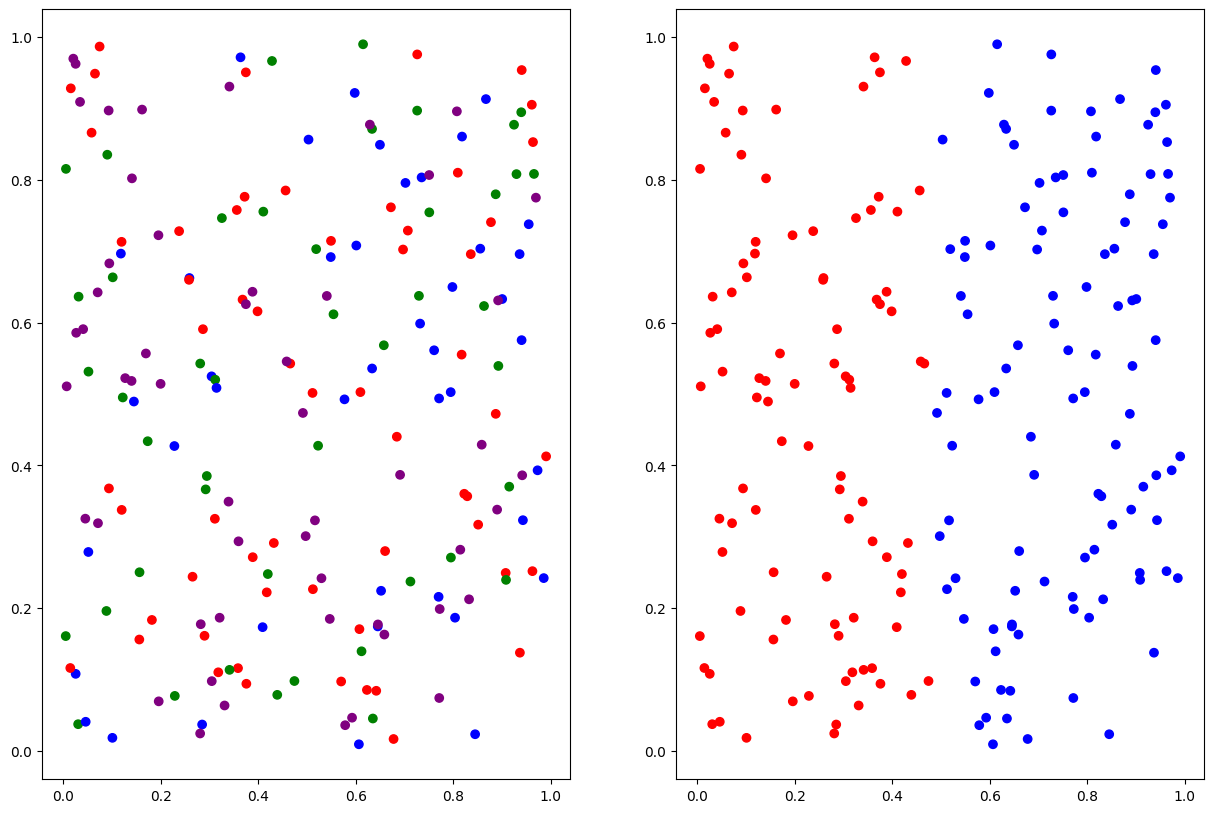

In [ ]:
centers = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

The left plot highlights the arbitrary starting point, where points are randomly assigned labels without any meaningful structure.

The right plot demonstrates the effectiveness of the clustering algorithm, which organizes the data into distinct, meaningful groups based on proximity.

The transition from random labels (left) to meaningful clusters (right) shows how the clustering algorithm groups points based on proximity. Our k-means clustering function was able to find natural groupings in the dataset, even though the points were randomly distributed initially.


Now, let's apply clustering to a real-world dataset. We will use the Mall Customers Dataset to group observations based on their Annual Income and Spending Score, identifying patterns and segmenting customers into meaningful clusters.

In [ ]:
# Upload file
uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


We apply k-means clustering to our training data.

In [ ]:
num_clusters = 5  # Number of clusters
centers = k_means_clustering(X_train_scaled, num_clusters)

# Assign cluster labels to the training data
cluster_labels = assign_clusters(X_train_scaled, centers)

# Add the labels to the DataFrame
df['Cluster'] = cluster_labels

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        0  
2        1  
3        0  
4        1  


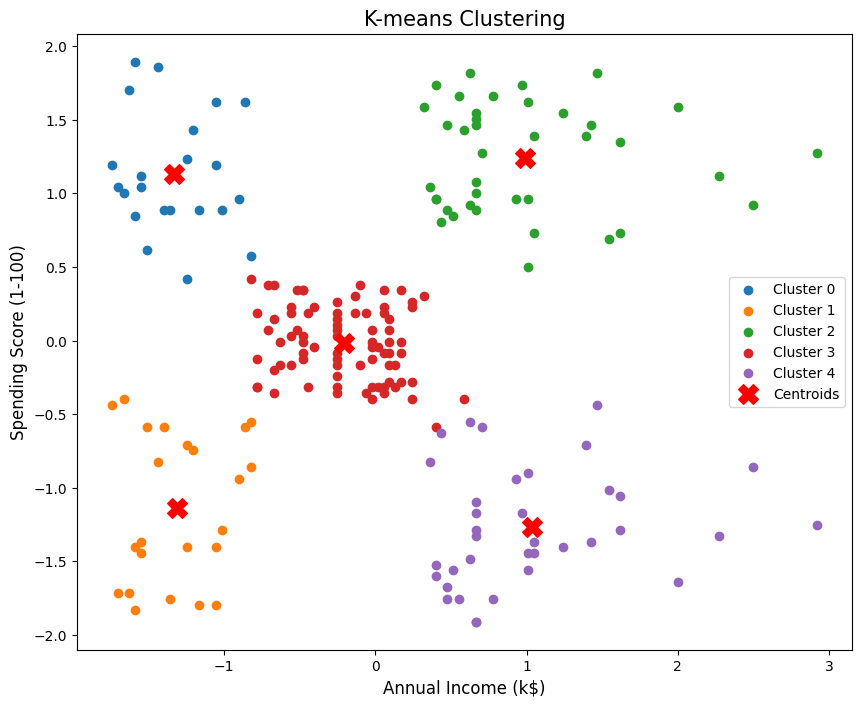

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_train_scaled[np.array(cluster_labels) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.scatter(
    [center[0] for center in centers],
    [center[1] for center in centers],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-means Clustering', fontsize=15)
plt.legend()
plt.show()


We have successfully segmented customers into distinct groups based on their income and spending behavior.


*   Cluster 0 (Blue):Customers with moderate to low spending scores and mid-level annual income.
*   Cluster 1 (Orange):
Low-income customers with low spending scores.


*   Cluster 2 (Green):
High-income customers with high spending scores.
*   Cluster 3 (Red):
Mid-level income customers with mid-level spending scores.

*   Cluster 4 (Purple):
High-income customers with low spending scores.
Centroids (Red "X" Markers):

The red "X" markers represent the centroids of each cluster. These are the mean positions of the points within each cluster and serve as the "center" of the group.

K-Means is a clustering algorithm that doesn't inherently handle unseen data points. To handle new unseen data, we can use KNN to extend the clustering by assigning labels to new data points based on proximity to the original clusters.

# Using K-Means with KNN

By incorporating KNN, the model can generalize the clustering results to predict labels for data points it has not encountered before. We split the data into training and testing sets to allow us to train the model on the training set and evaluate its performance on the testing set, mimicking real-world scenarios and assessing the model's ability to generalize.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_scaled, cluster_labels, test_size=0.2, random_state=42
)

In [ ]:
def distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

# KNN helper function to find nearest labels
def k_nearest_neighbors(point, training_features, training_labels, k):
    distances = []

    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        distances.append((label, d))

    # Sort by distance and return the k closest neighbors
    distances.sort(key=lambda x: x[1])
    return distances[:k]

# KNN prediction function
def KNN_Predict(point, training_features, training_labels, k, regression=False):
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)

    if not regression:
        labels = [label for label, _ in neighbors]
        return max(set(labels), key=labels.count)
    else:
        labels = [label for label, _ in neighbors]
        return sum(labels) / k

In [ ]:
k_neighbors = 3  # Number of nearest neighbors
y_test_pred = []

# Predict cluster labels for test points using KNN
for point in X_test_split:
    pred_label = KNN_Predict(point, X_train_split, y_train_split, k_neighbors)
    y_test_pred.append(pred_label)

# Convert predictions to a NumPy array
y_test_pred = np.array(y_test_pred)

# Evaluate the predictions
accuracy = np.sum(y_test_pred == y_test_split) / len(y_test_split)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


A 97% accuracy suggests that the KNN model is highly effective at generalizing the clustering results from the training data to unseen test data.

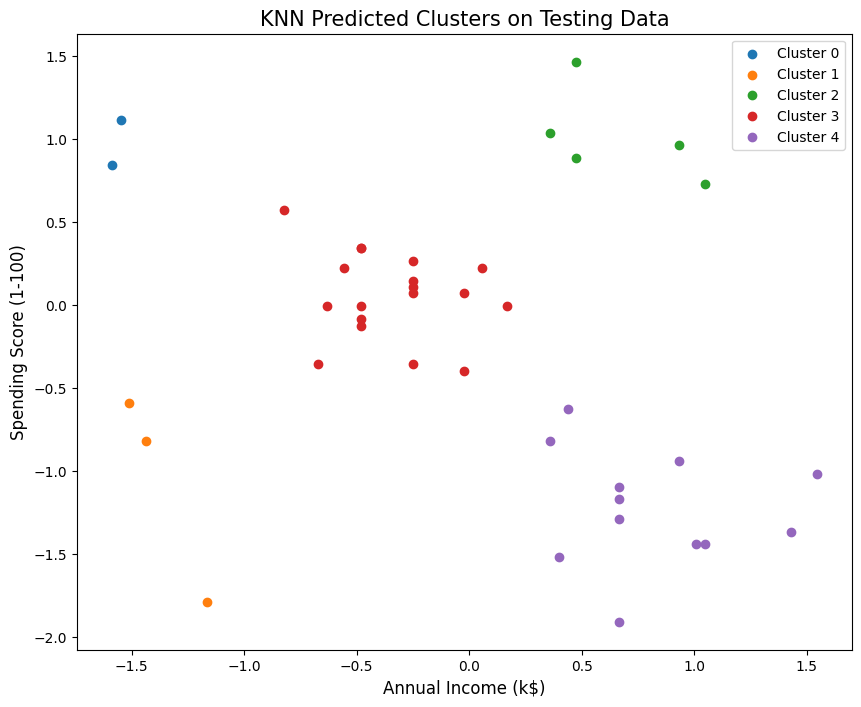

In [ ]:
# Visualize predictions
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(y_test_pred)  # Ensure correct cluster labels
for cluster in unique_clusters:
    cluster_points = X_test_split[np.array(y_test_pred) == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('KNN Predicted Clusters on Testing Data', fontsize=15)
plt.legend()
plt.show()

The predictions closely follow the patterns established in the K-Means training phase!

The KNN predictions align well with the cluster patterns from K-Means, indicating the model's ability to generalize the cluster labels.

---

By combining K-Means with KNN:

**Efficient Labeling of New Data**: KNN enables seamless labeling and integration of new data points without the need to re-run K-Means on the entire dataset. This is particularly valuable in scenarios like customer segmentation or anomaly detection, where new data is continuously added.

**Enhanced Generalization**: KNN extends the clustering process beyond the training data, allowing the model to classify or group new instances with high accuracy. This capability empowers businesses and researchers to make better decisions as they handle evolving data over time.

**Resource Efficiency in Dynamic Environments**: In dynamic settings where data updates frequently, KNN eliminates the need to reapply K-Means for every new data point. This significantly reduces computational costs while maintaining consistent cluster assignments, ensuring the model remains scalable and efficient.

